# <center> Imágenes y Machine Learning en Python
    


CLASE 12, Opcional

## Importación de librerías

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
#from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np
from PIL import Image

## Carga de Datos

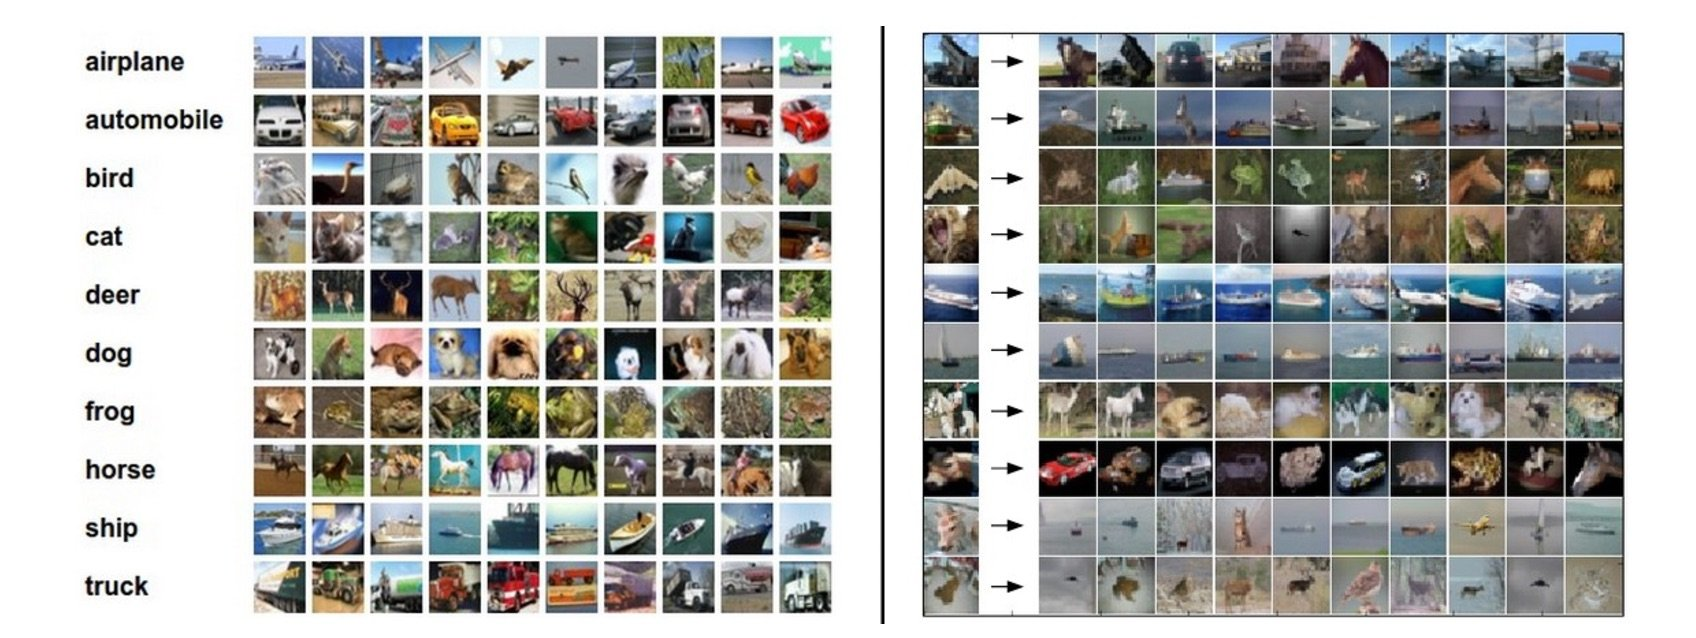

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
print(X_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


## Procesamiento de Datos

### Aumentación de Datos

Aumentamos los datos del dataset a partir de una función que cree a partir de una imagen original, imágenes rotadas de un ángulo determinado y que posean el mismo tamaño.

In [ ]:
def rotacion(imagen, angulo):
    imagen = Image.fromarray(imagen)
    imagen_rotada = imagen.rotate(angle = angulo, expand = False)
    return np.array(imagen_rotada)

Muestro un ejemplo

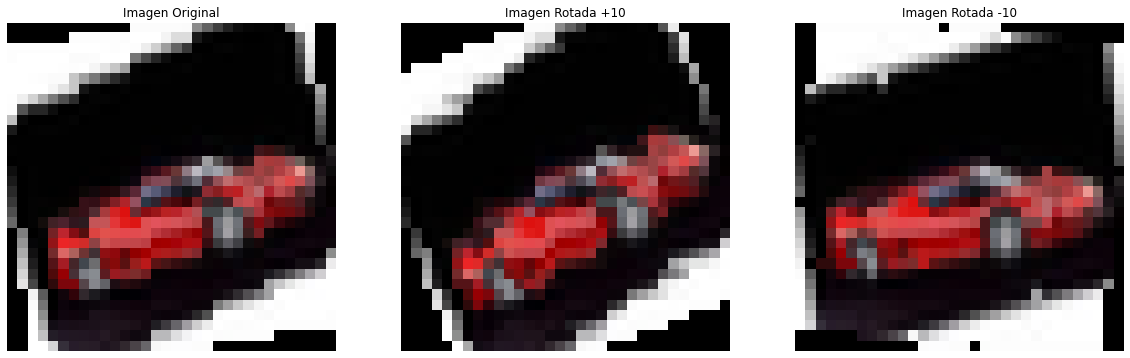

(32, 32, 3)


In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (20, 15))

ax[0].imshow(X_train[0]);
ax[0].axis('off')
ax[0].set_title('Imagen Original')

ax[1].imshow(rotacion(X_train[0], 10));
ax[1].axis('off')
ax[1].set_title('Imagen Rotada +10')

ax[2].imshow(rotacion(X_train[0], -10));
ax[2].axis('off')
ax[2].set_title('Imagen Rotada -10')

plt.show()

print(rotacion(X_train[0], 5).shape)

Defino una función que permita crear a partir de una imagen obtenida del dataset, 2 imágenes nuevas. En donde la primera imagen sea una imagen rotada de la imagen original con una rotación de $+ 10^{\circ}$ y la otra igual pero con una rotación de $- 10^{\circ}$

In [ ]:
def aumentacion(imagenes, etiquetas):
    lista_imagenes = []
    lista_etiquetas = []
    
    for i in range(imagenes.shape[0]):
        
        imagen, etiqueta = imagenes[i], etiquetas[i]

        lista_imagenes.append(imagen)
        lista_etiquetas.append(etiqueta)

        lista_imagenes.append(rotacion(imagen, 10))
        lista_etiquetas.append(etiqueta)    

        lista_imagenes.append(rotacion(imagen, -10))
        lista_etiquetas.append(etiqueta)
        
    list_aux = list(zip(lista_imagenes, lista_etiquetas))

    random.shuffle(list_aux)

    lista_imagenes, lista_etiquetas = zip(*list_aux)
    
    return np.asarray(lista_imagenes), np.asarray(lista_etiquetas)

Aplico función de aumentación de datos al dataset

In [ ]:
X_train, y_train = aumentacion(X_train, y_train)

print(X_train.shape, y_train.shape)

(150000, 32, 32, 3) (150000, 1)


Convierto las etiquetas en formato One - Hot

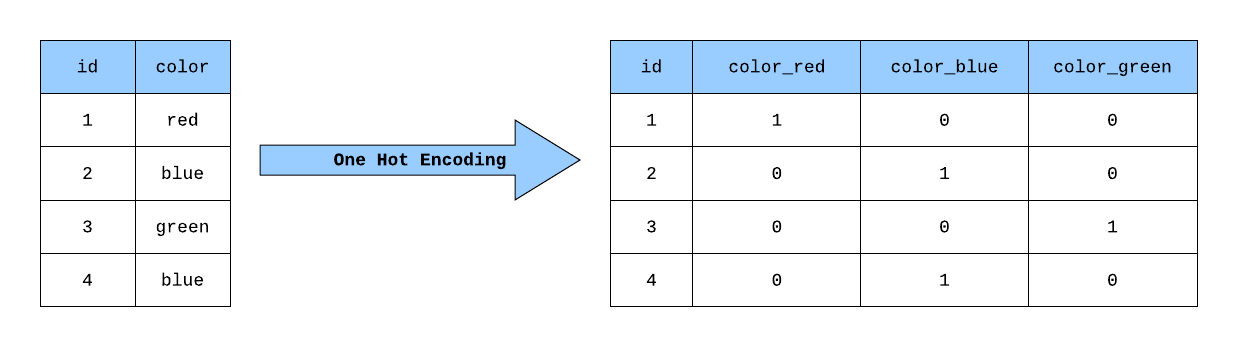

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## Red Neuronal con Regularización

A la arquitectura de esta red se le agregan los elementos de regularización

### Coeficientes de Regularización L2

Así como definimos una función de activación o el tamaño del kernel en la capa con los argumentos presentes en la misma, también podemos hacer lo mismo con los coeficientes de regularización. Agregamos en la capa el siguiente argumento:

* kernel_regularizer: Agregamos el tipo de coeficiente que queramos, en este caso L2 con el argumento keras.regularizers.l2("Valor de coeficiente de Regularización")

### Capa de Drop - Out

Podemos agregar una capa de Drop - Out luego de la capa Dense (fully - connected) para poder "apagar" valores de salida de esa capa. Posee la siguiente sintaxis:
* Valores_apagados_probabilísticamente = layers.Dropout(Probabilidad_de_Apagado)

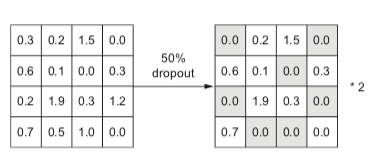

In [ ]:
Imagen_de_entrada = layers.Input(shape = (32, 32, 3))

X = layers.Conv2D(filters = 64, kernel_size = (3, 3), 
                  activation = None, 
                  kernel_regularizer = keras.regularizers.l2(0.01))(Imagen_de_entrada)

X = layers.BatchNormalization()(X)

X = layers.Activation("relu")(X)

In [ ]:
X = layers.MaxPooling2D(pool_size = (2, 2))(X)

X = layers.Conv2D(filters = 128, kernel_size = (3, 3), 
                  activation = None, 
                  kernel_regularizer = keras.regularizers.l2(0.01))(X)

X = layers.BatchNormalization()(X)

X = layers.Activation("relu")(X)

X = layers.MaxPooling2D(pool_size = (2, 2))(X)

Flatten = layers.Flatten()(X)

X = layers.Dense(256, activation = "sigmoid")(Flatten)

X = layers.Dropout(0.5)(X)

X = layers.Dense(64, activation = "sigmoid")(X)

X = layers.Dropout(0.5)(X)

Salida = layers.Dense(units = 10, activation = 'softmax')(Flatten)

Red_Neuronal = keras.Model(inputs = Imagen_de_entrada, outputs = Salida)

Red_Neuronal.compile(loss = 'categorical_crossentropy', 
                     optimizer = 'Adam', 
                     metrics = ['accuracy'])

Historia = Red_Neuronal.fit(x = X_train, 
                            y = y_train, 
                            epochs = 10, 
                            batch_size = 32, 
                            validation_data = (X_test, y_test))

Epoch 1/10
4688/4688 [==============================] - 323s 69ms/step - loss: 1.4526 - accuracy: 0.5759 - val_loss: 1.5454 - val_accuracy: 0.5330
Epoch 2/10
4688/4688 [==============================] - 320s 68ms/step - loss: 1.1285 - accuracy: 0.6649 - val_loss: 1.5012 - val_accuracy: 0.5485
Epoch 3/10
4688/4688 [==============================] - 315s 67ms/step - loss: 1.0450 - accuracy: 0.6902 - val_loss: 1.4437 - val_accuracy: 0.5679
Epoch 4/10
4688/4688 [==============================] - 317s 68ms/step - loss: 1.0030 - accuracy: 0.7043 - val_loss: 1.3558 - val_accuracy: 0.5907
Epoch 5/10
4688/4688 [==============================] - 308s 66ms/step - loss: 0.9717 - accuracy: 0.7126 - val_loss: 1.2141 - val_accuracy: 0.6353
Epoch 6/10
4688/4688 [==============================] - 328s 70ms/step - loss: 0.9512 - accuracy: 0.7199 - val_loss: 1.3200 - val_accuracy: 0.6107
Epoch 7/10
4688/4688 [==============================] - 315s 67ms/step - loss: 0.9391 - accuracy: 0.7250 - val_loss: 2

## Ilustración de Métricas de la Red

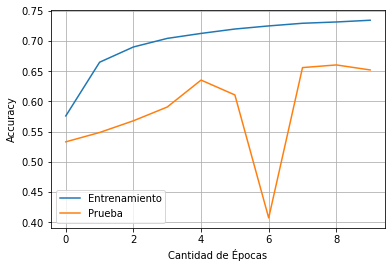

In [ ]:
plt.plot(Historia.history['accuracy'], label = 'Entrenamiento')
plt.plot(Historia.history['val_accuracy'], label = 'Prueba')
plt.grid()
plt.xlabel('Cantidad de Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()